In [57]:
import polars as pl

In [65]:
?pl.col

Call signature:
pl.col(
    name: 'str | PolarsDataType | Iterable[str] | Iterable[PolarsDataType]',
    *more_names: 'str | PolarsDataType',
) -> 'Expr'
Type:           Col
String form:    <polars.functions.col.Col object at 0x000002EC318ED580>
File:           c:\users\lr7273ow\appdata\local\anaconda3\envs\polar\lib\site-packages\polars\functions\col.py
Docstring:     
Create Polars column expressions.

Notes
-----
An instance of this class is exported under the name `col`. It can be used as
though it were a function by calling, for example, `pl.col("foo")`.
See the :func:`__call__` method for further documentation.

This helper class enables an alternative syntax for creating a column expression
through attribute lookup. For example `col.foo` creates an expression equal to
`col("foo")`.
See the :func:`__getattr__` method for further documentation.

The function call syntax is considered the idiomatic way of constructing a column
expression. The alternative attribute syntax can be use

In [4]:
pitching_data = (pl.read_csv('../data/Pitching.csv'))
#OneDrive - MNSCU/Documents/GitHub/my_site/data/Pitching.csv


pitching_data.head()

playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
str,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""aardsda01""",2004,1,"""SFN""","""NL""",1,0,11,0,0,0,0,32,20,8,1,10,5,0.417,6.75,0,0,2,0,61,5,8,0,1,1
"""aardsda01""",2006,1,"""CHN""","""NL""",3,0,45,0,0,0,0,159,41,24,9,28,49,0.214,4.08,0,1,1,0,225,9,25,1,3,2
"""aardsda01""",2007,1,"""CHA""","""AL""",2,1,25,0,0,0,0,97,39,23,4,17,36,0.3,6.4,3,2,1,0,151,7,24,2,1,1
"""aardsda01""",2008,1,"""BOS""","""AL""",4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2,3,5,0,228,7,32,3,2,4
"""aardsda01""",2009,1,"""SEA""","""AL""",3,6,73,0,0,0,38,214,49,20,4,34,80,0.19,2.52,3,2,0,0,296,53,23,2,1,2


In [5]:
(pitching_data.with_columns(DH =  pl.when(pl.col('yearID') < 1973)
                                     .then(pl.lit('Neither'))
                                     .when(pl.col('yearID')<=2019)
                                     .then(pl.lit("AL only"))
                                     .when(pl.col('yearID')==2021)
                                     .then(pl.lit('AL only'))
                                     .otherwise(pl.lit('Both'))
                           
                           
                           )
)


playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,DH
str,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str
"""aardsda01""",2004,1,"""SFN""","""NL""",1,0,11,0,0,0,0,32,20,8,1,10,5,0.417,6.75,0,0,2,0,61,5,8,0,1,1,"""AL only"""
"""aardsda01""",2006,1,"""CHN""","""NL""",3,0,45,0,0,0,0,159,41,24,9,28,49,0.214,4.08,0,1,1,0,225,9,25,1,3,2,"""AL only"""
"""aardsda01""",2007,1,"""CHA""","""AL""",2,1,25,0,0,0,0,97,39,23,4,17,36,0.3,6.4,3,2,1,0,151,7,24,2,1,1,"""AL only"""
"""aardsda01""",2008,1,"""BOS""","""AL""",4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2,3,5,0,228,7,32,3,2,4,"""AL only"""
"""aardsda01""",2009,1,"""SEA""","""AL""",3,6,73,0,0,0,38,214,49,20,4,34,80,0.19,2.52,3,2,0,0,296,53,23,2,1,2,"""AL only"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""zuverge01""",1958,1,"""BAL""","""AL""",2,2,45,0,0,0,7,207,74,26,4,17,22,0.28,3.39,3,2,6,0,294,23,29,null,null,null,"""Neither"""
"""zuverge01""",1959,1,"""BAL""","""AL""",0,1,6,0,0,0,0,39,15,6,1,6,1,0.3,4.15,0,1,0,0,55,1,7,null,null,null,"""Neither"""
"""zychto01""",2015,1,"""SEA""","""AL""",0,0,13,1,0,0,0,55,17,5,1,3,24,0.239,2.45,0,1,2,0,76,4,6,0,0,0,"""AL only"""


In [6]:
( pitching_data.group_by(['lgID','yearID'])
               .agg([pl.col('ER').sum().alias('total_runs'),pl.col('IPouts').sum().alias('total_outs')])
               .filter(pl.col('yearID')>=1946) 
               .with_columns(ERA = ((pl.col('total_runs')/pl.col('total_outs'))*27)
                             
                                            
           #     .group_by(['lgID','yearID'])
           #    .agg([pl.col('ER').mean(),pl.col('IPouts').mean()])

)
).head(156)




lgID,yearID,total_runs,total_outs,ERA
str,i64,i64,i64,f64
"""AL""",1954,4594,33315,3.723188
"""NL""",1952,4572,33083,3.731342
"""NL""",2018,9774,65485,4.0299
"""AL""",1984,9009,60840,3.998077
"""AL""",1989,8728,60543,3.892374
…,…,…,…,…
"""NL""",1976,6800,52372,3.50569
"""AL""",1961,6451,43280,4.024422
"""NL""",1948,4814,32867,3.954666


In [7]:
new_pitching_data = ( pitching_data.group_by(['lgID','yearID'])
               .agg([pl.col('ER').sum(),pl.col('IPouts').sum()])
               .filter(pl.col('yearID')>=1946) 
               .with_columns(ERA = ((pl.col('ER')/pl.col('IPouts'))*27))
               .with_columns(DH =  pl.when(pl.col('yearID') < 1973)
                                     .then(pl.lit('Neither'))
                                     .when(pl.col('yearID')<=2019)
                                     .then(pl.lit("AL only"))
                                     .when(pl.col('yearID')==2021)
                                     .then(pl.lit('AL only'))
                                     .otherwise(pl.lit('Both'))
                           
                           
                           )
                
                             
                                            
           #     .group_by(['lgID','yearID'])
           #    .agg([pl.col('ER').mean(),pl.col('IPouts').mean()])


)

new_pitching_data.head(156)




lgID,yearID,ER,IPouts,ERA,DH
str,i64,i64,i64,f64,str
"""AL""",1982,9224,61005,4.082419,"""AL only"""
"""AL""",1971,6662,51874,3.467517,"""Neither"""
"""AL""",1954,4594,33315,3.723188,"""Neither"""
"""NL""",1953,5219,32915,4.281118,"""Neither"""
"""AL""",2008,9788,60667,4.356174,"""AL only"""
…,…,…,…,…,…
"""NL""",1946,4202,33254,3.41174,"""Neither"""
"""NL""",2002,10563,69315,4.114564,"""AL only"""
"""NL""",1996,9520,60867,4.222978,"""AL only"""


In [46]:
pitching_stacked = (new_pitching_data.pivot(index = 'yearID', on = 'lgID',values = 'ERA'))
pitching_stacked = (pitching_stacked.with_columns((pl.col('AL')- pl.col('NL')).alias('AL-NL')))

pitching_stacked.head(78)


yearID,AL,NL,AL-NL
i64,f64,f64,f64
1982,4.082419,3.60855,0.473869
1971,3.467517,3.470082,-0.002565
1954,3.723188,4.072252,-0.349064
1953,3.995359,4.281118,-0.285759
2008,4.356174,4.295508,0.060666
…,…,…,…
1988,3.975479,3.454159,0.52132
1972,3.070675,3.456579,-0.385904
1999,4.871924,4.566783,0.305141


In [48]:
pitching_stacked = (pitching_stacked.unpivot(['NL','AL','AL-NL'], index = 'yearID',variable_name = 'lgID',value_name = 'ERA'))

In [50]:
pitching_stacked

yearID,lgID,ERA
i64,str,f64
1982,"""NL""",3.60855
1971,"""NL""",3.470082
1954,"""NL""",4.072252
1953,"""NL""",4.281118
2008,"""NL""",4.295508
…,…,…
1988,"""AL-NL""",0.52132
1972,"""AL-NL""",-0.385904
1999,"""AL-NL""",0.305141


In [42]:
pitching_data.write_csv('../data/pitching_table.csv')

In [31]:
import plotnine as plt9
from plotnine import ggplot,geom_line, aes, geom_hline, geom_vline, ylim,xlim
from plotnine.scales import scale_color_manual

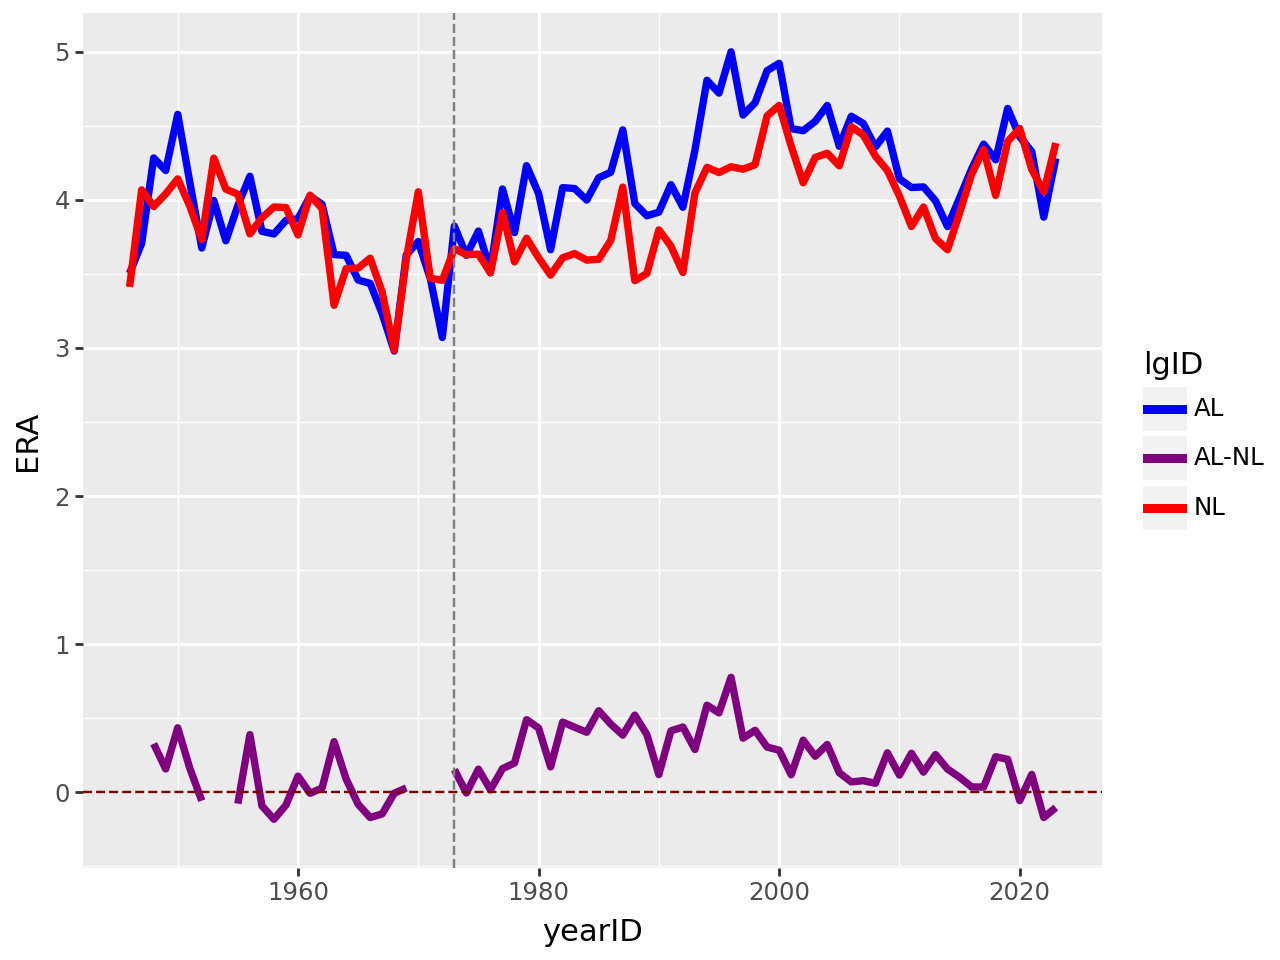

In [95]:
(    plt9.ggplot(data=pitching_stacked) 
    + geom_line(aes(x = "yearID", y = "ERA", color = 'lgID'),size = 1.5) 
    + scale_color_manual(values = {"NL" : "red", "AL" : "blue","AL-NL":'purple'})
    + ylim(-0.25,5)
    + geom_vline(xintercept = 1973, linetype = 'dashed',color = 'gray')
    + geom_hline(yintercept = 0, linetype  = 'dashed', color = 'maroon')
 
)

In [68]:
batting_data = (pl.read_csv('../data/Batting.csv'))
batting_data.head()


playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
str,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,i64
"""abercda01""",1871,1,"""TRO""","""NA""",1,4,0,0,0,0,0,0,0,0,0,0,null,null,null,null,0
"""addybo01""",1871,1,"""RC1""","""NA""",25,118,30,32,6,0,0,13,8,1,4,0,null,null,null,null,0
"""allisar01""",1871,1,"""CL1""","""NA""",29,137,28,40,4,5,0,19,3,1,2,5,null,null,null,null,1
"""allisdo01""",1871,1,"""WS3""","""NA""",27,133,28,44,10,2,2,27,1,1,0,2,null,null,null,null,0
"""ansonca01""",1871,1,"""RC1""","""NA""",25,120,29,39,11,3,0,16,6,2,2,1,null,null,null,null,0


In [54]:
(batting_data.with_columns(DH =  pl.when(pl.col('yearID') < 1973)
                                     .then(pl.lit('Neither'))
                                     .when(pl.col('yearID')<=2019)
                                     .then(pl.lit("AL only"))
                                     .when(pl.col('yearID')==2021)
                                     .then(pl.lit('AL only'))
                                     .otherwise(pl.lit('Both'))
                           
                           
                           ))

playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,DH
str,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,i64,str
"""abercda01""",1871,1,"""TRO""","""NA""",1,4,0,0,0,0,0,0,0,0,0,0,null,null,null,null,0,"""Neither"""
"""addybo01""",1871,1,"""RC1""","""NA""",25,118,30,32,6,0,0,13,8,1,4,0,null,null,null,null,0,"""Neither"""
"""allisar01""",1871,1,"""CL1""","""NA""",29,137,28,40,4,5,0,19,3,1,2,5,null,null,null,null,1,"""Neither"""
"""allisdo01""",1871,1,"""WS3""","""NA""",27,133,28,44,10,2,2,27,1,1,0,2,null,null,null,null,0,"""Neither"""
"""ansonca01""",1871,1,"""RC1""","""NA""",25,120,29,39,11,3,0,16,6,2,2,1,null,null,null,null,0,"""Neither"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""zimmejo02""",2019,1,"""DET""","""AL""",23,2,0,0,0,0,0,0,0,0,0,2,"""0""","""0""","""0""","""0""",0,"""AL only"""
"""zimmeky01""",2019,1,"""KCA""","""AL""",15,0,0,0,0,0,0,0,0,0,0,0,"""0""","""0""","""0""","""0""",0,"""AL only"""
"""zimmery01""",2019,1,"""WAS""","""NL""",52,171,20,44,9,0,6,27,0,0,17,39,"""0""","""0""","""0""","""2""",4,"""AL only"""


In [84]:
batting_data= (batting_data.group_by(['lgID','yearID'])
             .agg([pl.col('SB').sum(),pl.col('2B').sum(),pl.col('3B').sum(),pl.col('HR').sum(),pl.col('AB').sum()])
             .filter(pl.col('yearID')>= 1946) 
             .with_columns(SLG = (pl.col('SB') + (2*pl.col('2B')) + (3*pl.col('3B'))+(4*pl.col('HR')))/pl.col('AB'))
             
                )
batting_data.head()

lgID,yearID,SB,2B,3B,HR,AB,SLG
str,i64,i64,i64,i64,i64,i64,f64
"""AL""",1991,1469,3680,453,1953,77603,0.23195
"""AL""",1976,1690,2588,467,1122,65711,0.194108
"""AL""",1959,414,1690,267,1091,41964,0.213493
"""AL""",1972,853,2260,316,1175,61712,0.178588
"""NL""",1968,704,1995,359,891,54913,0.169996


In [86]:
batting_stacked = (batting_data.pivot(index = 'yearID', on = 'lgID',values = 'SLG')
                               .with_columns((pl.col('AL')- pl.col('NL')).alias('AL-NL'))
                  
                  
                  )
batting_stacked.head()

yearID,AL,NL,AL-NL
i64,f64,f64,f64
1991,0.23195,0.219261,0.012689
1976,0.194108,0.191707,0.002401
1959,0.213493,0.227333,-0.01384
1972,0.178588,0.197478,-0.01889
1968,0.185984,0.169996,0.015988


In [89]:
batting_unstacked = (batting_stacked.unpivot(['NL','AL','AL-NL'],index = 'yearID',variable_name = 'lgID',value_name = 'SLG' ))
batting_unstacked.head()

yearID,lgID,SLG
i64,str,f64
1991,"""NL""",0.219261
1976,"""NL""",0.191707
1959,"""NL""",0.227333
1972,"""NL""",0.197478
1968,"""NL""",0.169996


In [ ]:
(    plt9.ggplot(data=pitching_stacked) 
    + geom_line(aes(x = "yearID", y = "ERA", color = 'lgID'),size = 1.5) 
    + scale_color_manual(values = {"NL" : "red", "AL" : "blue","AL-NL":'purple'})
    + ylim(0,5)
    + geom_vline(xintercept = 1973, linetype = 'dashed',color = 'gray')
    + geom_hline(yintercept = 0, linetype  = 'dashed', color = 'maroon')
 
)

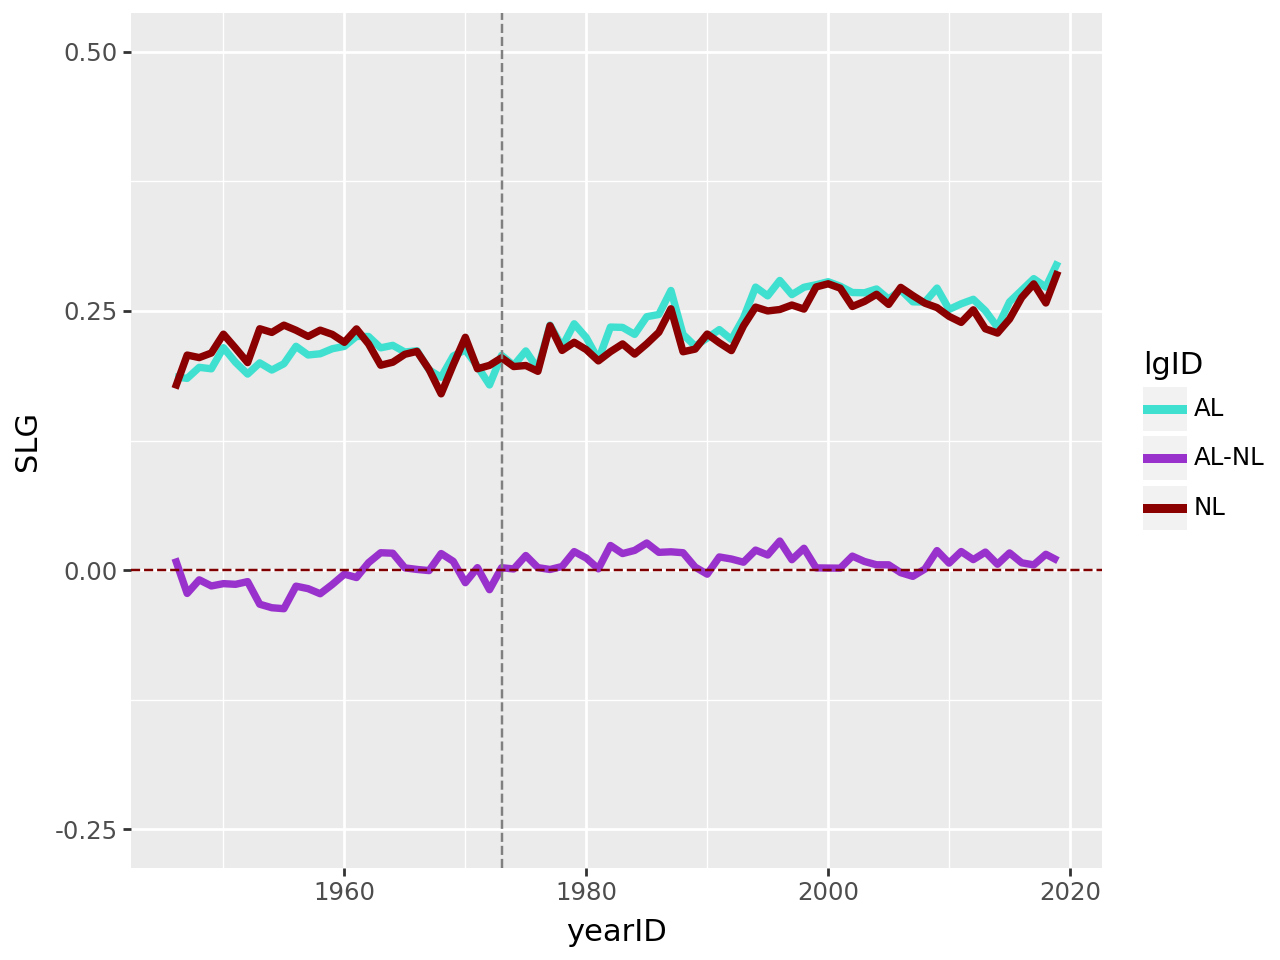

In [94]:
(    plt9.ggplot(data= batting_unstacked) 
    + geom_line(aes(x = "yearID", y = "SLG", color = 'lgID'),size = 1.5) 
    + scale_color_manual(values = {"NL" : "darkred", "AL" : "turquoise","AL-NL":'darkorchid'})
    + ylim(-0.25,0.5)
    + geom_vline(xintercept = 1973, linetype = 'dashed',color = 'gray')
    + geom_hline(yintercept = 0, linetype  = 'dashed', color = 'maroon')
 
)